<a href="https://colab.research.google.com/github/Abdallahyx/ResNet50-From-Scratch/blob/main/train_with_imagenet_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Abdallahyx/ResNet50-From-Scratch.git

In [2]:
%cd ResNet50-From-Scratch/

/content/ResNet50-From-Scratch


In [3]:
!ls

blocks.py	 kaggle.json  __pycache__  resnet50.py	training_set
cat-and-dog.zip  LICENSE      README.md    test_set	train.ipynb


## **Import Packages**

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## **Download The Dataset**


In [5]:
# upload kaggle JSON file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

In [ ]:
!unzip cat-and-dog.zip

## **Data Pre-processing**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

traindir = '/content/ResNet50-From-Scratch/training_set/training_set'
testdir = '/content/ResNet50-From-Scratch/test_set/test_set'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        traindir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size = 64,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        testdir,
        target_size=(150, 150),
        batch_size = 64,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## **Import ResNet50 Model**

In [7]:
from resnet50 import ResNet50

model = ResNet50(input_shape = (150,150,3), include_top=False, weights='imagenet')

In [ ]:
model.summary()

In [9]:
last_layer = model.get_layer('average_pooling2d')

In [10]:
x = tf.keras.layers.Flatten()(last_layer.output)
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)

new_model = tf.keras.Model(model.input,x)

In [ ]:
new_model.summary()

In [12]:
new_model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

### **Train The Model**

In [13]:
history = new_model.fit(train_generator, epochs = 5, validation_data = test_generator)  

Epoch 1/5
126/126 [==============================] - 66s 437ms/step - loss: 0.5446 - accuracy: 0.7948 - val_loss: 0.3297 - val_accuracy: 0.8532
Epoch 2/5
126/126 [==============================] - 53s 416ms/step - loss: 0.2121 - accuracy: 0.9111 - val_loss: 0.1889 - val_accuracy: 0.9263
Epoch 3/5
126/126 [==============================] - 53s 420ms/step - loss: 0.1334 - accuracy: 0.9492 - val_loss: 0.2458 - val_accuracy: 0.8927
Epoch 4/5
126/126 [==============================] - 53s 417ms/step - loss: 0.1049 - accuracy: 0.9601 - val_loss: 0.1862 - val_accuracy: 0.9273
Epoch 5/5
126/126 [==============================] - 53s 417ms/step - loss: 0.0822 - accuracy: 0.9690 - val_loss: 0.1674 - val_accuracy: 0.9338


### **Plot The Accuracy**

In [14]:
new_model.evaluate(test_generator)

32/32 [==============================] - 10s 297ms/step - loss: 0.1605 - accuracy: 0.9372


[0.16048738360404968, 0.9372219443321228]

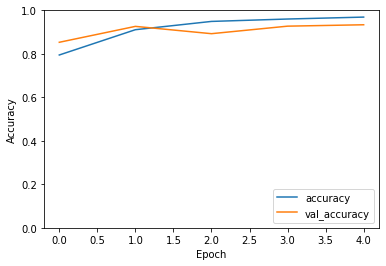

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')